In [1]:
import pandas as pd
import numpy as np
import os 
from glob import glob
import random 
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
PATH = '/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Output/Chain_02.23/used'
FLAG_DATA = 'RunOne'
SHP = '/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/State Shp Files/AL/Alabama_VTD_District_Intersection.shp'

gdf = gpd.read_file(SHP)
gdf["incumbent"] = gdf["incumbent"].fillna(0)

pattern = os.path.join(PATH, FLAG_DATA + '_assignments' + '*')
files = glob(pattern)

In [3]:
def plot_random_maps(PATH, FLAG_DATA, GDF, num_maps = int):

    fig,ax = plt.subplots(1,num_maps,figsize=(4*num_maps,num_maps))

    pattern = os.path.join(PATH, FLAG_DATA + '_assignments' + '*')
    files = glob(pattern)

    for i in range(num_maps):
        
        file_num = random.randrange(0,len(files))
        map_num = random.randrange(1,2001)

        file = files[file_num]
        data = pd.read_csv(file).set_index('Iteration').reset_index()

        gdf['cd_117'] = data[str(map_num)]
        gdf.plot(column="cd_117",ax = ax[i])
        ax[i].set_xlabel(str(file_num) + ' ' + str(map_num))

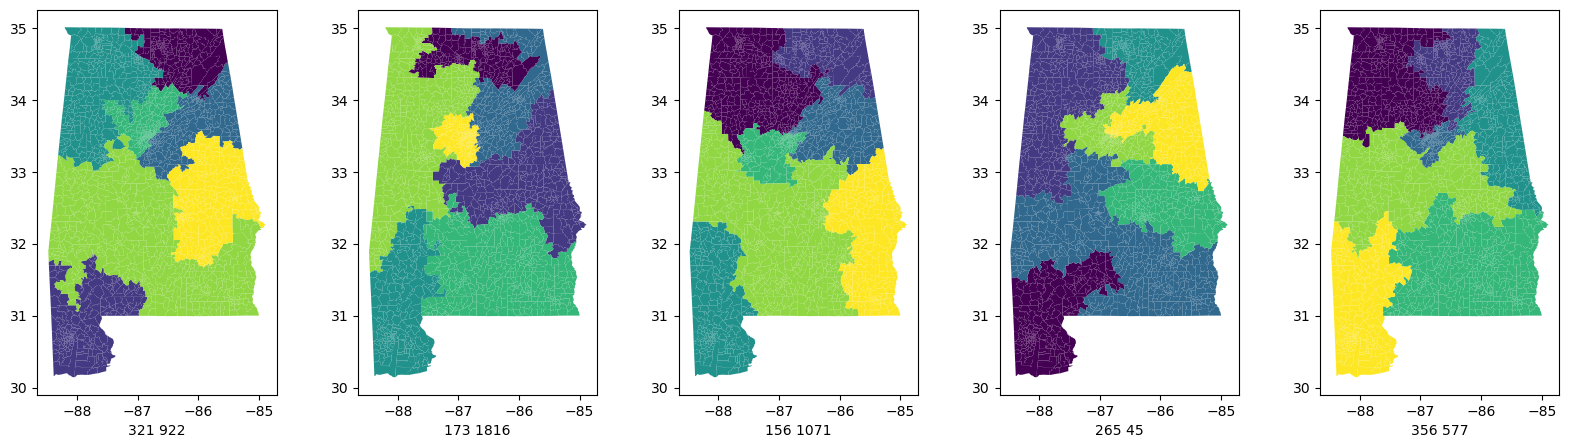

In [107]:
plot_random_maps(PATH=PATH, FLAG_DATA=FLAG_DATA, GDF=gdf, num_maps=5)

In [4]:
def plot_map(file_num = int, map_num = int):

    file = files[file_num]
    data = pd.read_csv(file).set_index('Iteration').reset_index()

    gdf['cd_117'] = data[str(map_num)]
    gdf.plot(column="cd_117")

    return file_num, map_num 

In [5]:
def what_changed(file_num, map_num, gdf):

    # getting the data to plot

    gdf = gdf.set_index('vtd_cd_117')[['cd_117','geometry']]

    data = pd.read_csv(files[file_num]).set_index('Iteration')

    idx = data[str(map_num - 1)] != data[str(map_num)]

    #change_df = data[idx][[str(map_num-1),str(map_num)]]

    gdf['change'] = idx

    # first map
    first_map = gdf.merge(right=data[str(map_num-1)],right_index=True, left_index=True)
    # second map
    second_map = gdf.merge(right=data[str(map_num)],right_index=True, left_index=True)
    
    # plot

    fig,ax = plt.subplots(1,3,figsize = (20,12))

    first_map.plot(column=str(map_num-1),ax = ax[0])
    second_map.plot(column=str(map_num), ax = ax[1])
    gdf.plot(column='change',ax = ax[2],cmap='PiYG')
    

    return gdf,data,first_map,second_map 

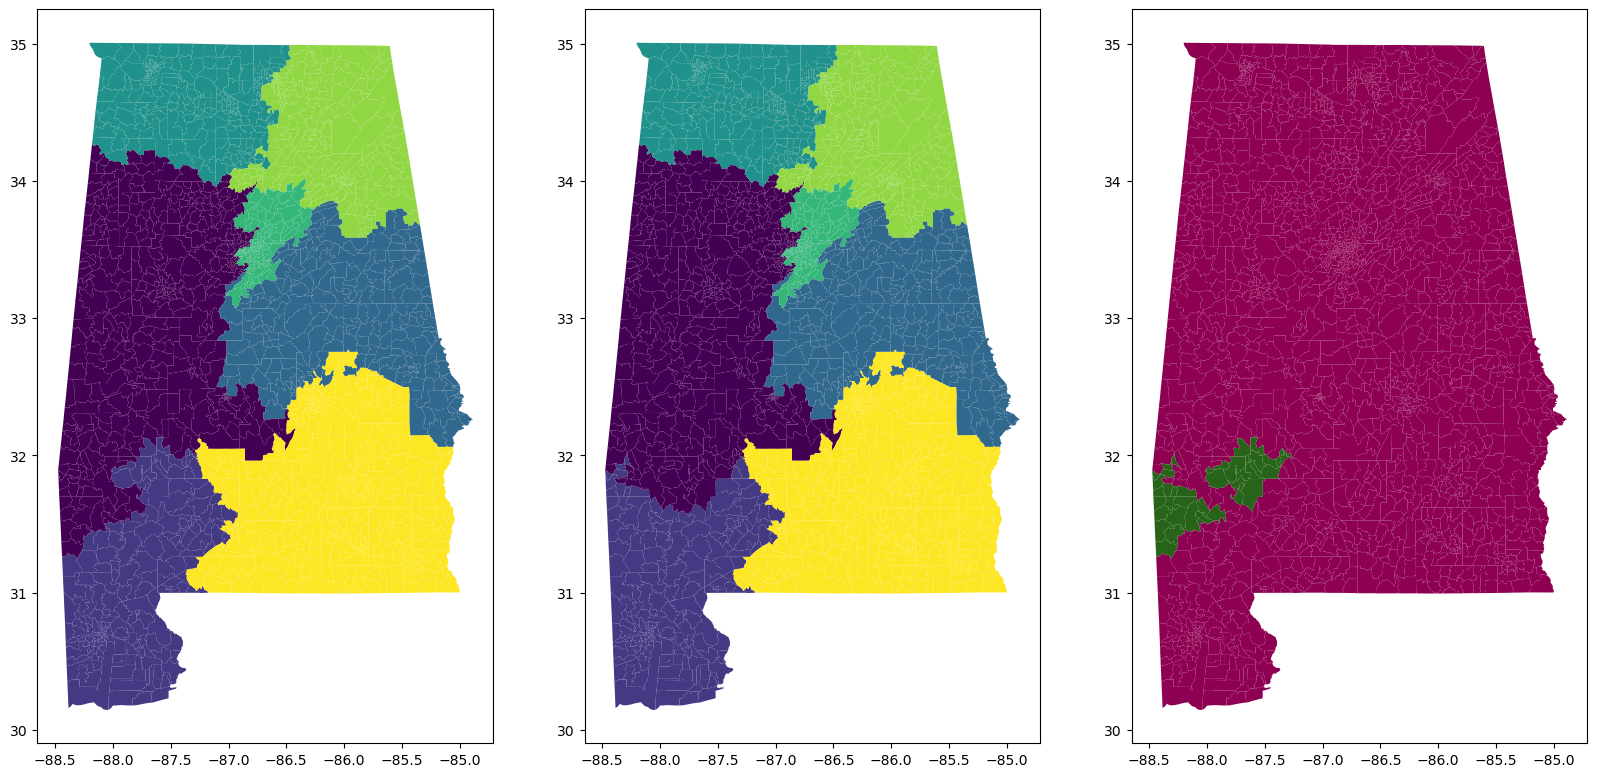

In [357]:
gdf, data, one, two= what_changed(1,3,gdf)

In [6]:
drop = pd.read_csv(files[10]).set_index('Iteration')
drop

1     2     3     4     5     6     7     8     9    10  \
Iteration                                                                       
01003000001_01001  1007  1007  1007  1007  1007  1007  1007  1007  1007  1007   
01003000002_01001  1007  1007  1007  1007  1007  1007  1007  1007  1007  1007   
01003000003_01001  1007  1007  1007  1007  1007  1007  1007  1007  1007  1007   
01003000004_01001  1007  1007  1007  1007  1007  1007  1007  1007  1007  1007   
01003000005_01001  1007  1007  1007  1007  1007  1007  1007  1007  1007  1007   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
01131005006_01007  1007  1007  1007  1007  1007  1007  1007  1003  1003  1003   
01131006001_01007  1002  1002  1002  1005  1005  1003  1003  1003  1003  1003   
01131006002_01007  1007  1007  1007  1007  1007  1007  1007  1003  1003  1003   
01131006004_01007  1007  1007  1007  1007  1007  1007  1007  1007  1007  1007   
01131006005_01007  1007  1007  1007  1007  1007  1007  1007  1003  1003  1003   

                   ...  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
Iteration          ...                                                         
01003000001_01001  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   
01003000002_01001  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   
01003000003_01001  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   
01003000004_01001  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   
01003000005_01001  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
01131005006_01007  ...  1005  1005  1001  1001  1001  1001  1001  1001  1001   
01131006001_01007  ...  1004  1004  1004  1001  1001  1001  1001  1001  1001   
01131006002_01007  ...  1004  1004  1004  1001  1001  1001  1001  1001  1001   
01131006004_01007  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   
01131006005_01007  ...  1004  1004  1004  1004  1004  1004  1004  1004  1004   

                   2000  
Iteration                
01003000001_01001  1004  
01003000002_01001  1004  
01003000003_01001  1004  
01003000004_01001  1004  
01003000005_01001  1004  
...                 ...  
01131005006_01007  1003  
01131006001_01007  1003  
01131006002_01007  1003  
01131006004_01007  1004  
01131006005_01007  1004  

[1844 rows x 2000 columns]

In [8]:
gdf = gdf.set_index('vtd_cd_117')[['cd_117','geometry']]

In [10]:
data.columns


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'],
      dtype='object')

In [11]:
data[data.columns[0]]

Iteration
01003000001_01001    1007
01003000002_01001    1007
01003000003_01001    1007
01003000004_01001    1007
01003000005_01001    1007
                     ... 
01131005006_01007    1007
01131006001_01007    1002
01131006002_01007    1007
01131006004_01007    1007
01131006005_01007    1007
Name: 1, Length: 1844, dtype: int64

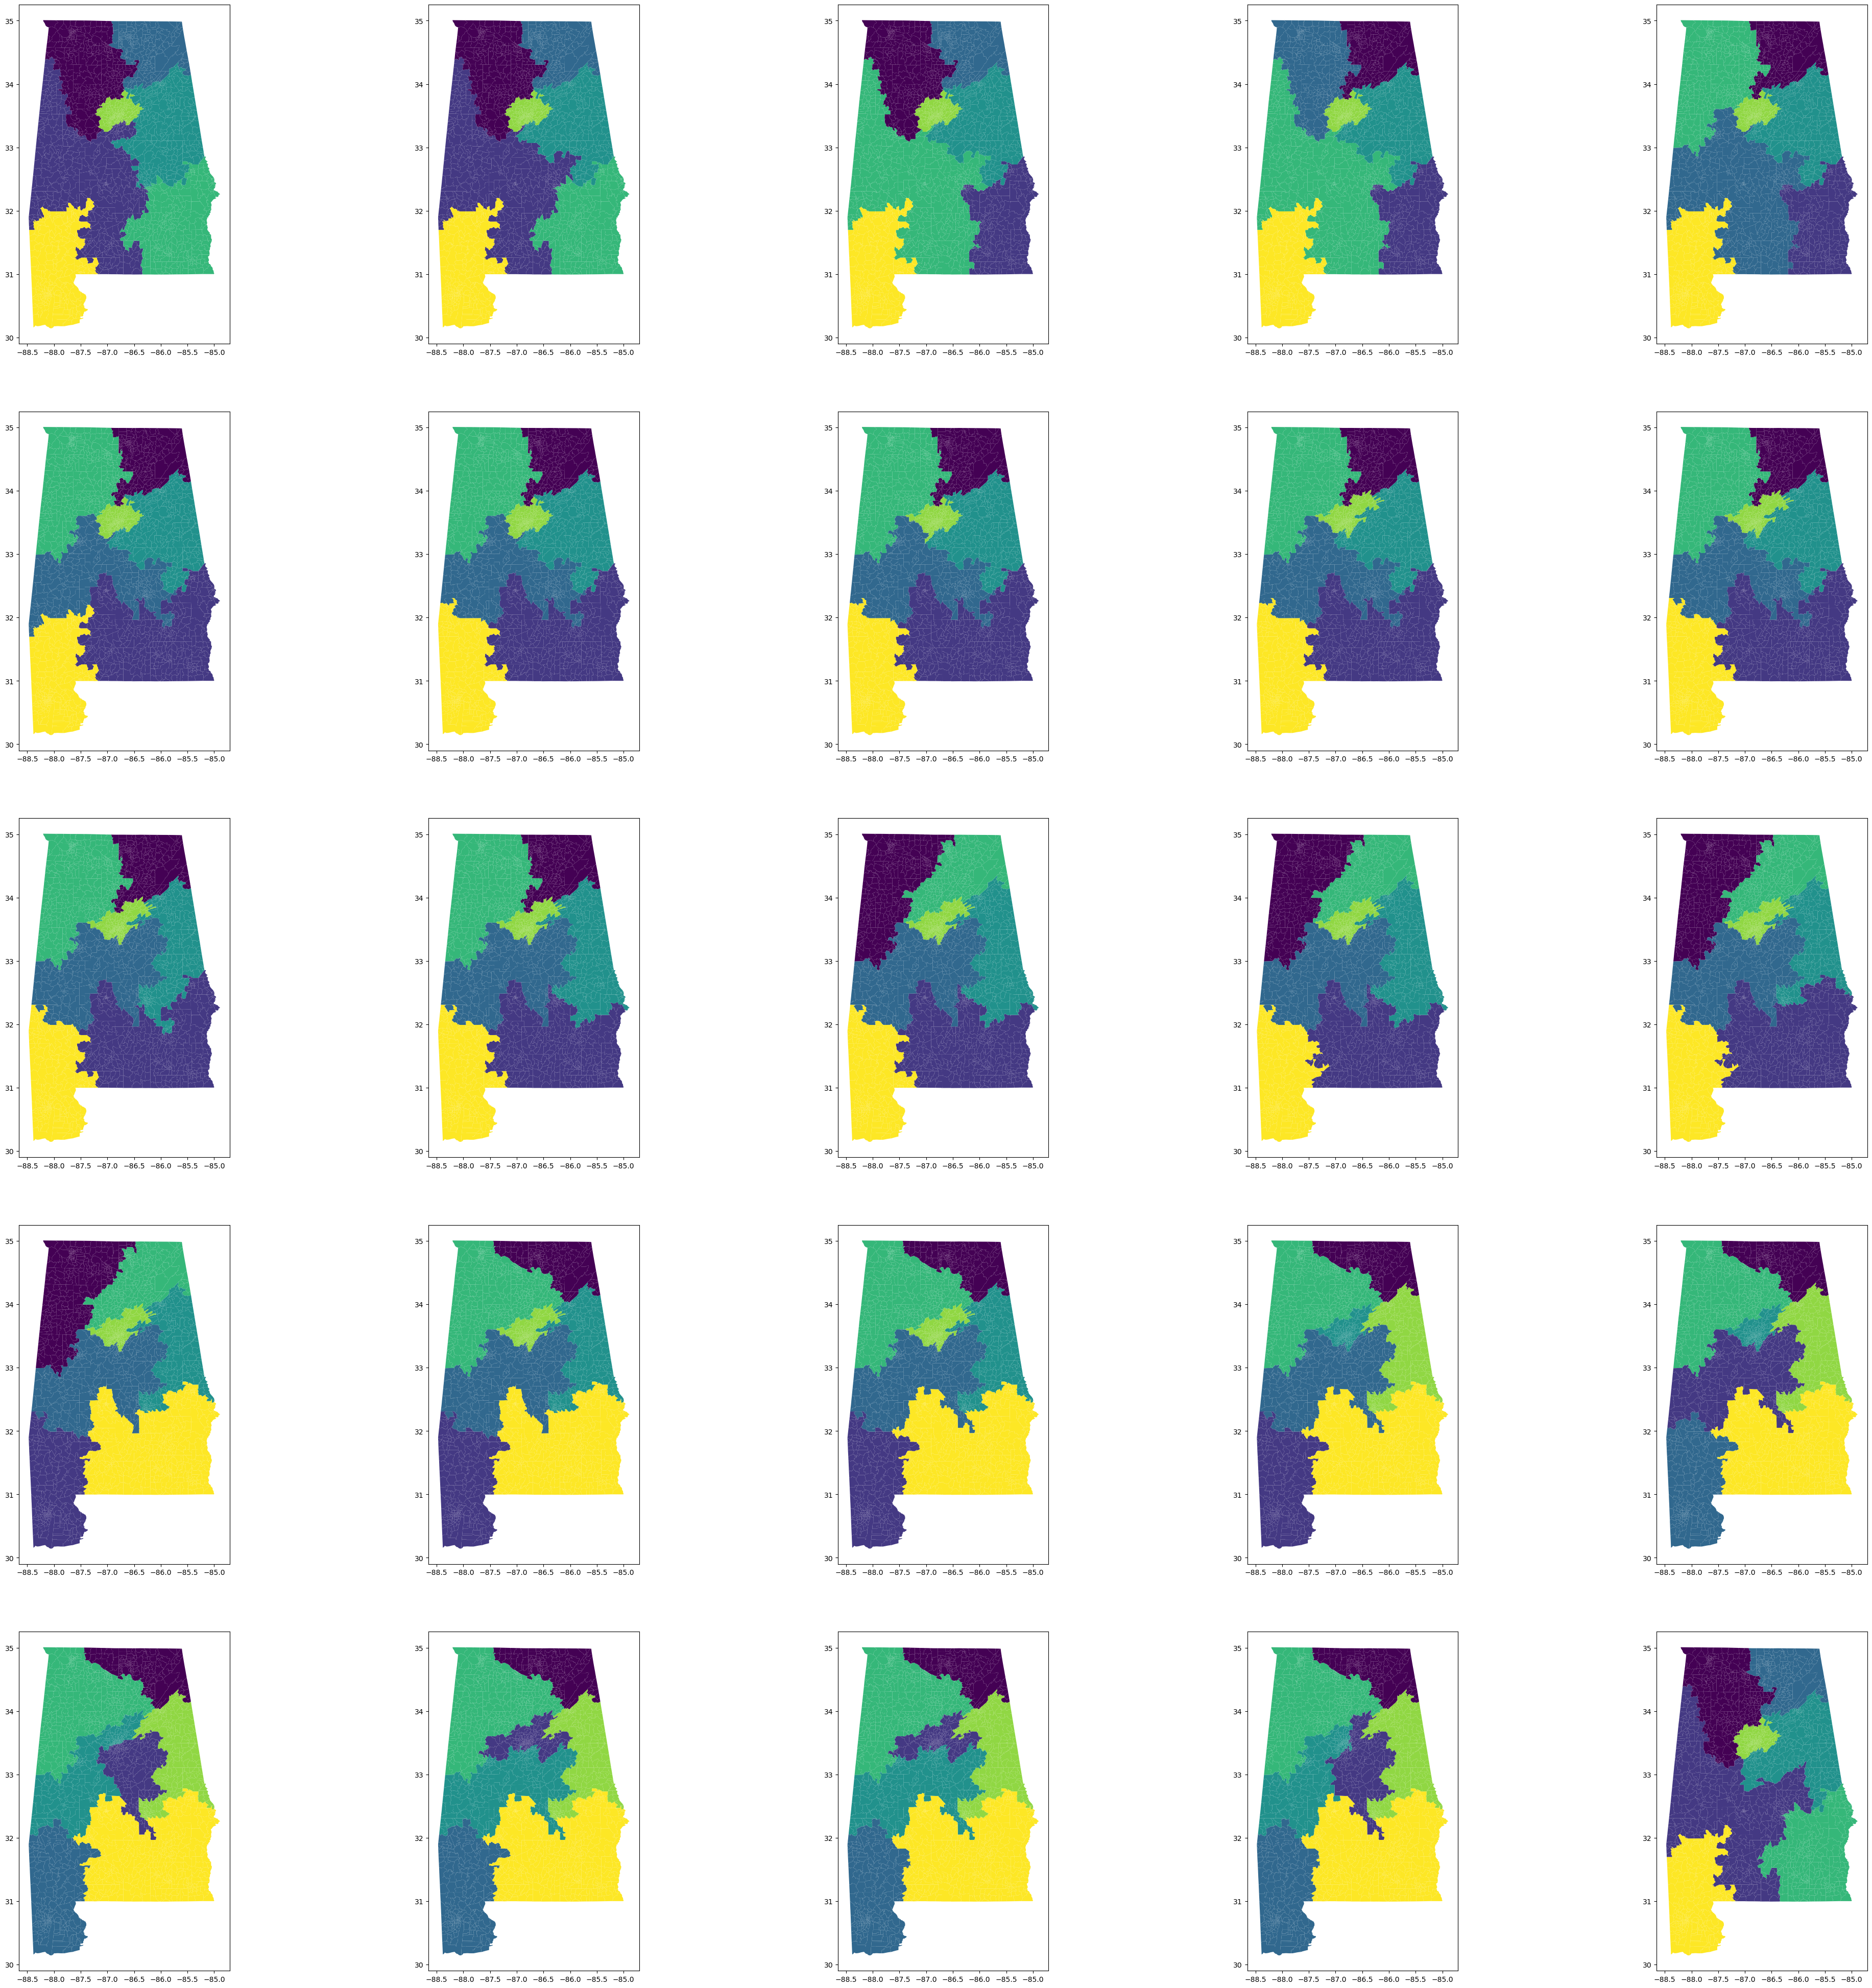

In [13]:
fig,ax = plt.subplots(5,5,figsize = (50,50))

for i, column in enumerate(drop.iloc[:,:25].columns):

    data = drop[column]
    map = gdf.merge(right=data,right_index=True, left_index=True)


    m = int(np.floor(i/5-.001))
    n= i%5-1
    map.plot(column=column,ax = ax[m,n])
